In [1]:
# Install TensorFlow if not available
!pip install -q tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Load the Boston Housing dataset
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Example features:", x_train[0])
print("Example label (price in $1000s):", y_train[0])


57026/57026 [==============================] - 0s 0us/step
Training data shape: (404, 13)
Testing data shape: (102, 13)
Example features: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Example label (price in $1000s): 15.2


In [3]:
# Normalize features (very important for DNNs)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [4]:
# Simple DNN model for Linear Regression
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')  # Linear activation for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Train the model
history = model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100


21/21 [==============================] - 3s 32ms/step - loss: 563.7068 - mae: 21.9187 - val_loss: 600.1518 - val_mae: 22.7618
Epoch 2/100
21/21 [==============================] - 0s 9ms/step - loss: 499.1359 - mae: 20.4910 - val_loss: 522.9245 - val_mae: 21.1111
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 410.2180 - mae: 18.3655 - val_loss: 409.5970 - val_mae: 18.4071
Epoch 4/100
21/21 [==============================] - 0s 9ms/step - loss: 289.2117 - mae: 15.0027 - val_loss: 267.1815 - val_mae: 14.1872
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 164.4675 - mae: 10.5409 - val_loss: 149.8347 - val_mae: 9.6621
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 93.5868 - mae: 7.4446 - val_loss: 96.9709 - val_mae: 7.4399
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 64.9433 - mae: 5.9808 - val_loss: 68.2021 - val_mae: 6.0048
Epoch 8/100
21/21 [============================

In [6]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(x_test_scaled, y_test, verbose=0)
print("Test MAE: {:.2f}".format(test_mae))


Test MAE: 3.07


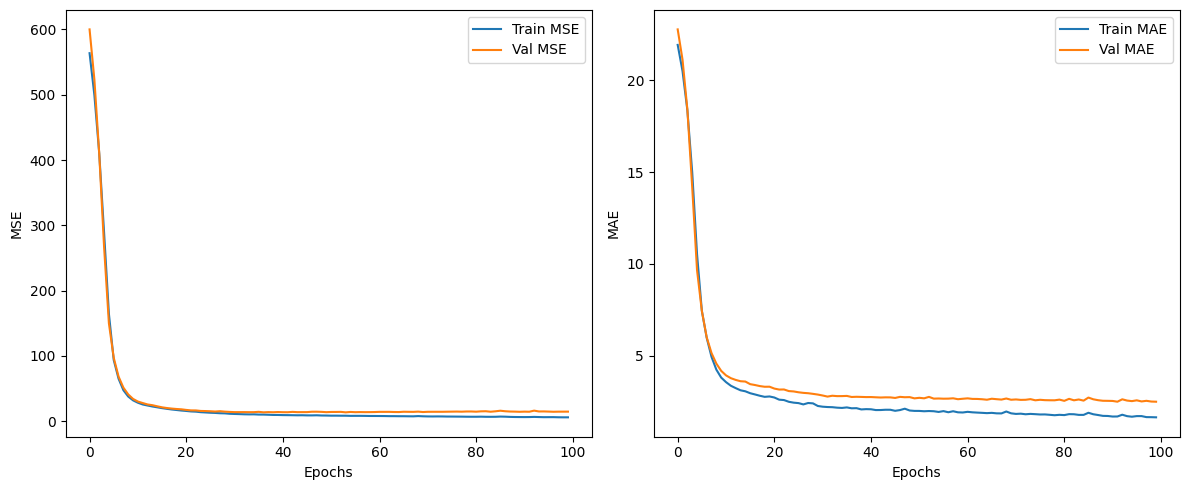

In [7]:
# Plot loss and MAE over epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Val MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Predict on test set
y_pred = model.predict(x_test_scaled).flatten()

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


4/4 [==============================] - 0s 3ms/step
Test RMSE: 5.05
R² Score: 0.69


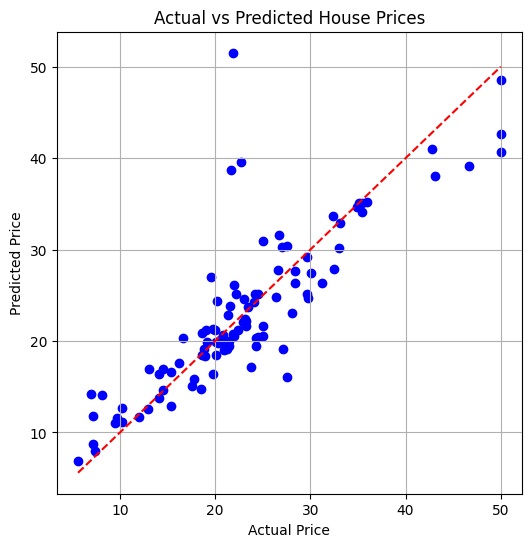

In [9]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
